In [2]:
#Imports up here
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from cleaning import read_and_clean
# Dealing with some weird issues importing cleaning so I just copied those methods into here for now

In [3]:
def read_to_one_frame(path) -> pd.DataFrame:
    """Reads all csv files in a directory and concatenates them into a single DataFrame"""
    df = pd.DataFrame()
    for file in os.listdir(path):
        if not file.endswith('20.csv'):
            year = '20' + str(file[-6:-4])
            file = os.path.join(path, file)
            if file.endswith('.csv'):
                currYear = pd.read_csv(file)
                currYear['YEAR'] = year
                df = pd.concat([df, currYear])

    df.drop('EFGD_D', axis = 1, inplace = True)

    return df


def encode_postseason(df: pd.DataFrame) -> pd.DataFrame:
    """Encodes postseason games as 1 and regular season games as 0"""
    rankings = {
        'Champions': 1,
        '2ND': 2,
        'F4': 3, 
        'E8': 4,
        'S16': 5,
        'R32': 6,
        'R64': 7,
        'R68': 8,
    }

    df['POSTSEASON'] = df['POSTSEASON'].map(rankings)
    return df


def arrange_cols(df: pd.DataFrame) -> pd.DataFrame:
    """Rearranges columns"""
    col_order = list(df.columns[:-3]) + ['SEED', 'YEAR', 'POSTSEASON']
    return df[col_order]

def create_made_postseason(df):
    """Creates a new column that indicates whether a team made the postseason"""
    #replace N/A with NA
    df['MADE_POSTSEASON'] = np.where(pd.isna(df['POSTSEASON']), 0, 1)
    return df

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """Cleans data"""
    df = encode_postseason(df)
    df = arrange_cols(df)
    df = create_made_postseason(df)
    return df


def read_and_clean(path: str) -> pd.DataFrame:
    """Reads and cleans data"""
    df = read_to_one_frame(path)
    return clean_data(df)

In [19]:
#Putting data into df dataframe
df = read_and_clean('../data')
df.tail()
# df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_31520\2861604861.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MADE_POSTSEASON'] = np.where(pd.isna(df['POSTSEASON']), 0, 1)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,POSTSEASON,MADE_POSTSEASON
358,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,2023,NaN,0
359,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,2023,NaN,0
360,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,2023,NaN,0
361,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,2023,NaN,0
362,North Texas,CUSA,36,31,110.0,93.8,0.8622,51.2,44.5,19.8,...,49.6,44.2,35.7,30.1,58.7,1.1,NaN,2023,NaN,0


In [5]:
#Correlation of teams stats strictly looking at whether or not a team made March Madness
these_columns = ['W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','SEED','MADE_POSTSEASON']
df_postseason_correlation = df[these_columns].copy()
postseason_correlation = df_postseason_correlation.corr(method='pearson')['MADE_POSTSEASON'].sort_values()
postseason_correlation

ADJDE             -0.495591
EFG_D             -0.388447
2P_D              -0.351269
3P_D              -0.289355
ADJ_T             -0.032184
3P_O               0.260112
2P_O               0.320068
EFG_O              0.350247
ADJOE              0.543512
BARTHAG            0.576490
W                  0.600956
WAB                0.643949
MADE_POSTSEASON    1.000000
SEED                    NaN
Name: MADE_POSTSEASON, dtype: float64

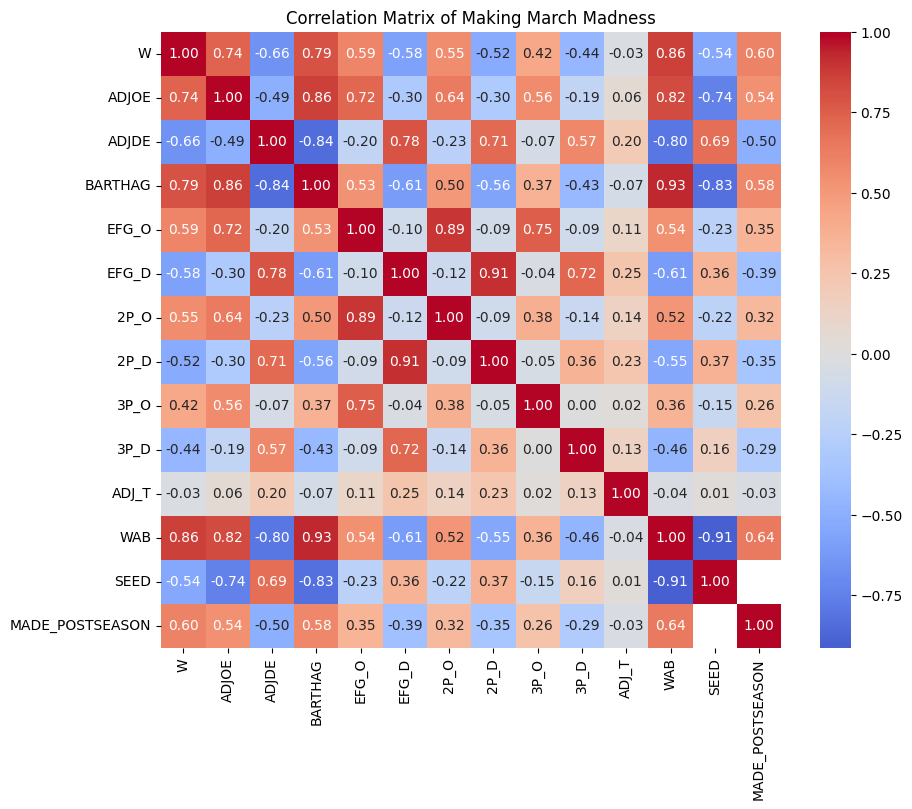

In [6]:
#Heatmap of entire Correlation Matrix, looking at whether or not a team made March Madness
correlation_matrix = df_postseason_correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Making March Madness')
plt.show()

In [7]:
#Correlation matrix stricly examing teams that made March Madness and where they finished in March Madness
df_made_postseason = df[df['MADE_POSTSEASON'] == 1]
selected_columns = ['W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','SEED','POSTSEASON']
df_correlation_copy = df_made_postseason[selected_columns].copy() #Excluding Team, CONF, G, MADE_POSTSEASON

correlation_POSTSEASON = df_correlation_copy.corr(method='pearson')['POSTSEASON'].sort_values()
correlation_POSTSEASON

W            -0.559413
WAB          -0.556219
ADJOE        -0.521685
BARTHAG      -0.494966
EFG_O        -0.239155
2P_O         -0.225257
3P_O         -0.147424
ADJ_T         0.049961
3P_D          0.139781
2P_D          0.221796
EFG_D         0.251926
ADJDE         0.444616
SEED          0.570671
POSTSEASON    1.000000
Name: POSTSEASON, dtype: float64

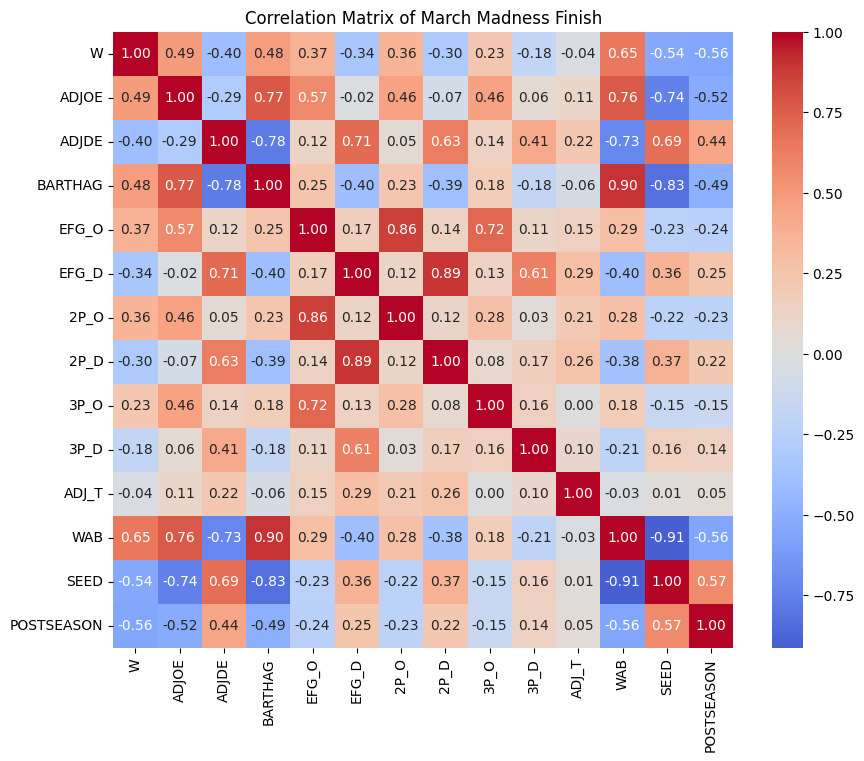

In [8]:
#Heatmap of entire Correlation Matrix
correlation_matrix = df_correlation_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of March Madness Finish')
plt.show()

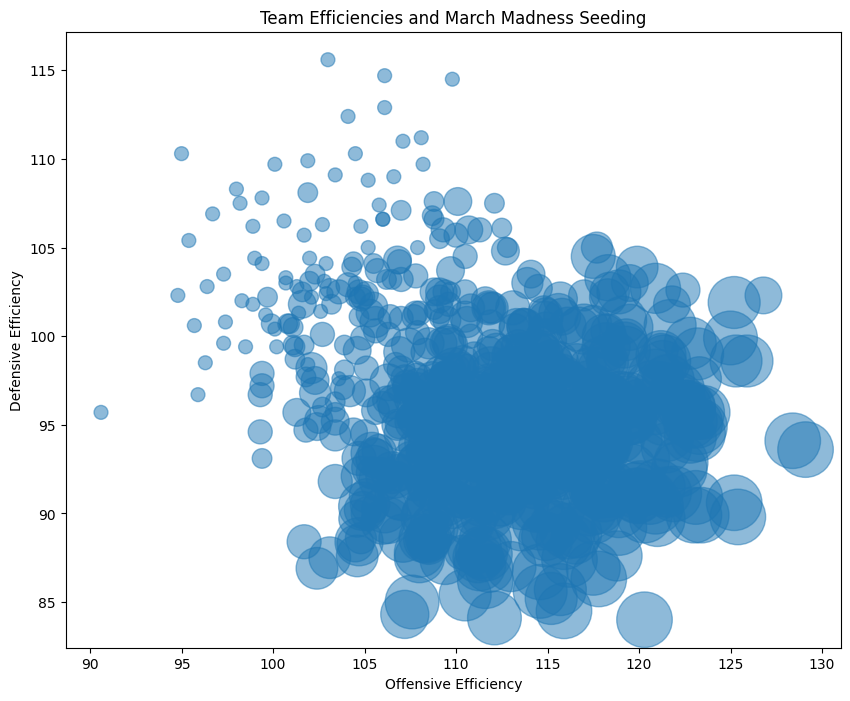

In [9]:
# Bubble chart plotting offensive and defensive efficiency compared March Madness Seeding
# Larger bubble = higher seed
df_made_postseason = df[df['MADE_POSTSEASON'] == 1]
selected_columns = ['ADJOE', 'ADJDE', 'SEED']
df_bubble = df_made_postseason[selected_columns].copy()

max_seed = df['SEED'].max()
plt.figure(figsize=(10, 8))
plt.scatter(df_bubble['ADJOE'], df_bubble['ADJDE'], s=(max_seed - df_bubble['SEED'] + 1) * 100, alpha=0.5)

plt.xlabel('Offensive Efficiency')
plt.ylabel('Defensive Efficiency')
plt.title('Team Efficiencies and March Madness Seeding')

plt.show()

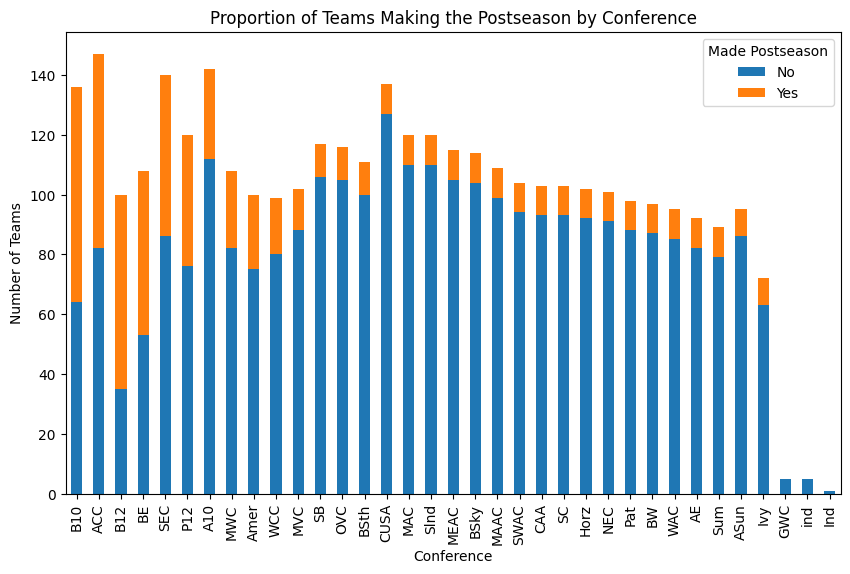

In [12]:
#Stacked bar chart displaying proportion of teams making the tournament based on conference
#I wouldn't say it is a crazy useful visualization but could be interesting to have/know if there
#is any influence based on what conference a team is in
#Conference realignments in recent years would also affect this
df_stacked_bar = df.copy()

postseason_counts = df_stacked_bar.groupby(['CONF', 'MADE_POSTSEASON']).size().unstack(fill_value=0)
postseason_counts = postseason_counts.sort_values(by=[1, 0], ascending=False)
postseason_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Proportion of Teams Making the Postseason by Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.legend(title='Made Postseason', labels=['No', 'Yes'])

plt.show()

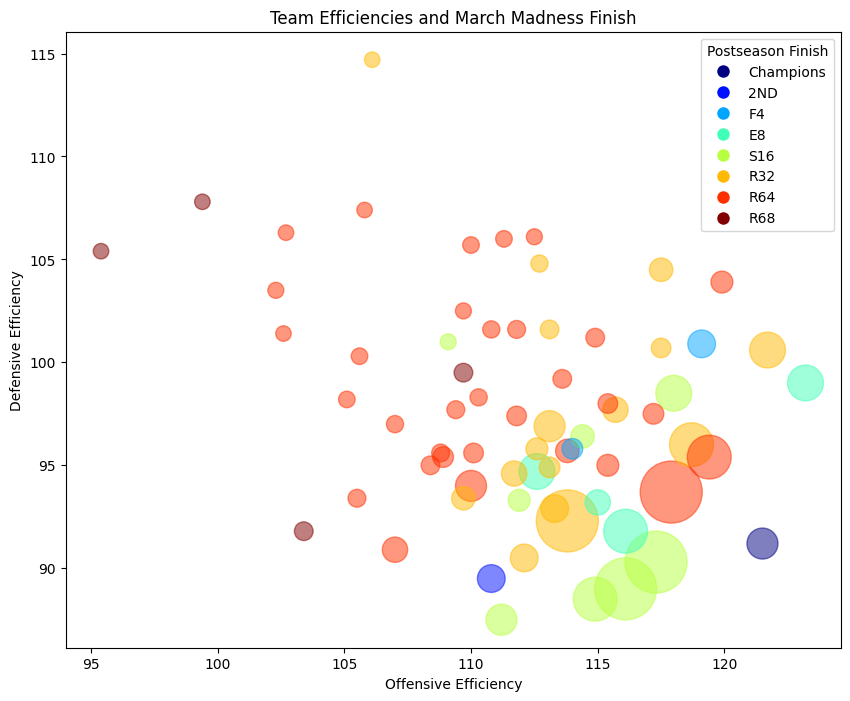

In [43]:
#Team efficiencies, their seed, and where they finished in the 2023 March Madness tournament
df_23 = df[df['YEAR'] == '2023']
df_23_MM = df_23[df_23['MADE_POSTSEASON'] == 1]
bubble_sizes = 2000 * (1 / df_23_MM['SEED'])

unique_positions = sorted(df_23_MM['POSTSEASON'].unique())
colors = plt.cm.jet(np.linspace(0, 1, len(unique_positions)))
color_map = {position: color for position, color in zip(unique_positions, colors)}

position_labels = {
    1: 'Champions',
    2: '2ND',
    3: 'F4',
    4: 'E8',
    5: 'S16',
    6: 'R32',
    7: 'R64',
    8: 'R68'
}

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_23_MM['ADJOE'], df_23_MM['ADJDE'], s=bubble_sizes, c=[color_map[pos] for pos in df_23_MM['POSTSEASON']], alpha=0.5)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pos], label=position_labels[pos], markersize=10) for pos in unique_positions]
plt.legend(handles=handles, title="Postseason Finish")

plt.xlabel('Offensive Efficiency')
plt.ylabel('Defensive Efficiency')
plt.title('Team Efficiencies and March Madness Finish')

plt.show()